# MATPLOTLIB

Link: https://matplotlib.org/

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_90 = pd.read_excel(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Population\Population table - 1970 - 2023 - Panda.xlsx", sheet_name='1990s_population (2)')

In [5]:
#grand total_population
grand_total_population = df_90.groupby('Year').agg({
    'Total': 'sum'
}).reset_index()

#Grand total of male population
df_90['Male_Total'] = df_90[["Male_Bumi", "Male_Chinese", "Male_Indian", "Male_Others",	"Male_non Citizens"]].sum(axis=1)
df_90['Female_Total'] = df_90[["Female_Bumi", "Female_Chinese", "Female_Indian", "Female_Others", "Female_non Citizens"]].sum(axis=1)


#Group by 'Year' and aggregate totals
combined_pop = df_90.groupby('Year').agg({
    'Total': 'sum',
    'Male_Total': 'sum',
    'Female_Total': 'sum'
}).reset_index()

#rename column
combined_pop.columns = ['Year', 'Total Pop', 'Total Male', 'Total Female']

combined_pop

,Year,Total Pop,Total Male,Total Female
0,1991,18547.1,9416.5,9130.9
1,1992,19067.3,9687.1,9380.2
2,1993,19601.6,9963.4,9637.7
3,1994,20141.7,10242.7,9898.9
4,1995,20681.7,10521.2,10160.5
5,1996,21222.7,10800.8,10422.7
6,1997,21769.1,11081.7,10687.2
7,1998,22333.5,11371.8,10961.7
8,1999,22909.6,11666.4,11243.1
9,2000,23495.0,11965.2,11529.5


# Line plot

- Visualizing trends over time

- covid happened on 2019, females pop were the most affected

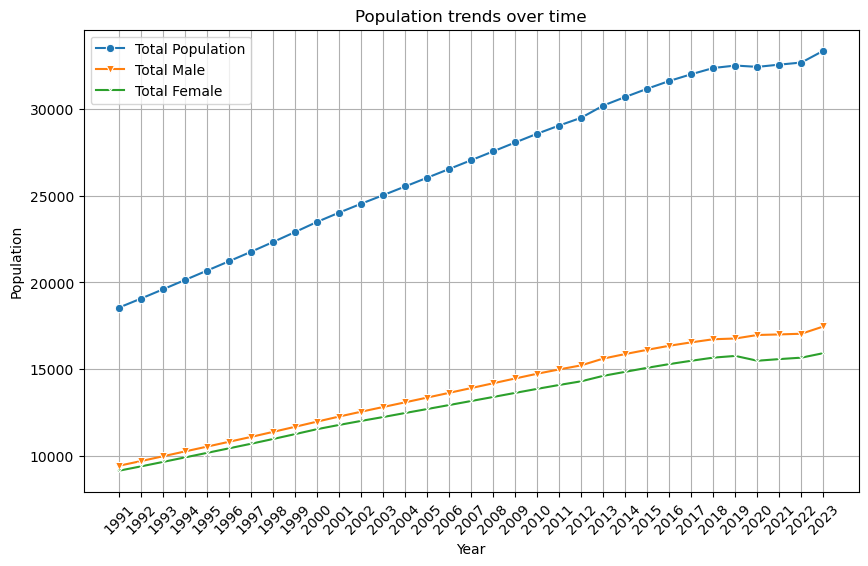

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(data=combined_pop, x='Year', y='Total Pop', label='Total Population', marker='o')
sns.lineplot(data=combined_pop, x='Year', y='Total Male', label='Total Male', marker='v')
sns.lineplot(data=combined_pop, x='Year', y='Total Female', label='Total Female', marker='x')

plt.title('Population trends over time')
plt.xlabel('Year')
plt.ylabel("Population")
plt.legend()
plt.grid(True)

#label each year
plt.xticks(ticks=combined_pop['Year'], rotation=45)

plt.show()

# Bar plot

- Compare different populations for each year

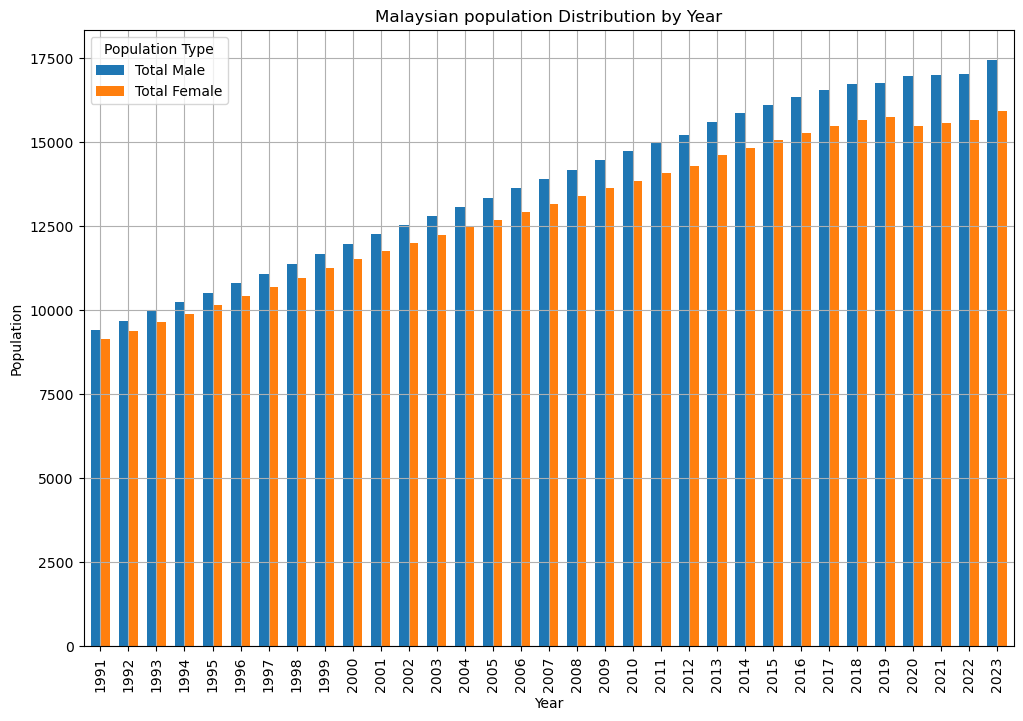

In [8]:
combined_pop.set_index('Year')[['Total Male', 'Total Female']].plot(kind='bar', width=0.7, figsize=(12,8))

plt.title('Malaysian population Distribution by Year')
plt.xlabel('Year')
plt.ylabel("Population")
plt.legend(title='Population Type')
plt.grid(True)
plt.show()

# Heatmap

- Intensity and distribution of population

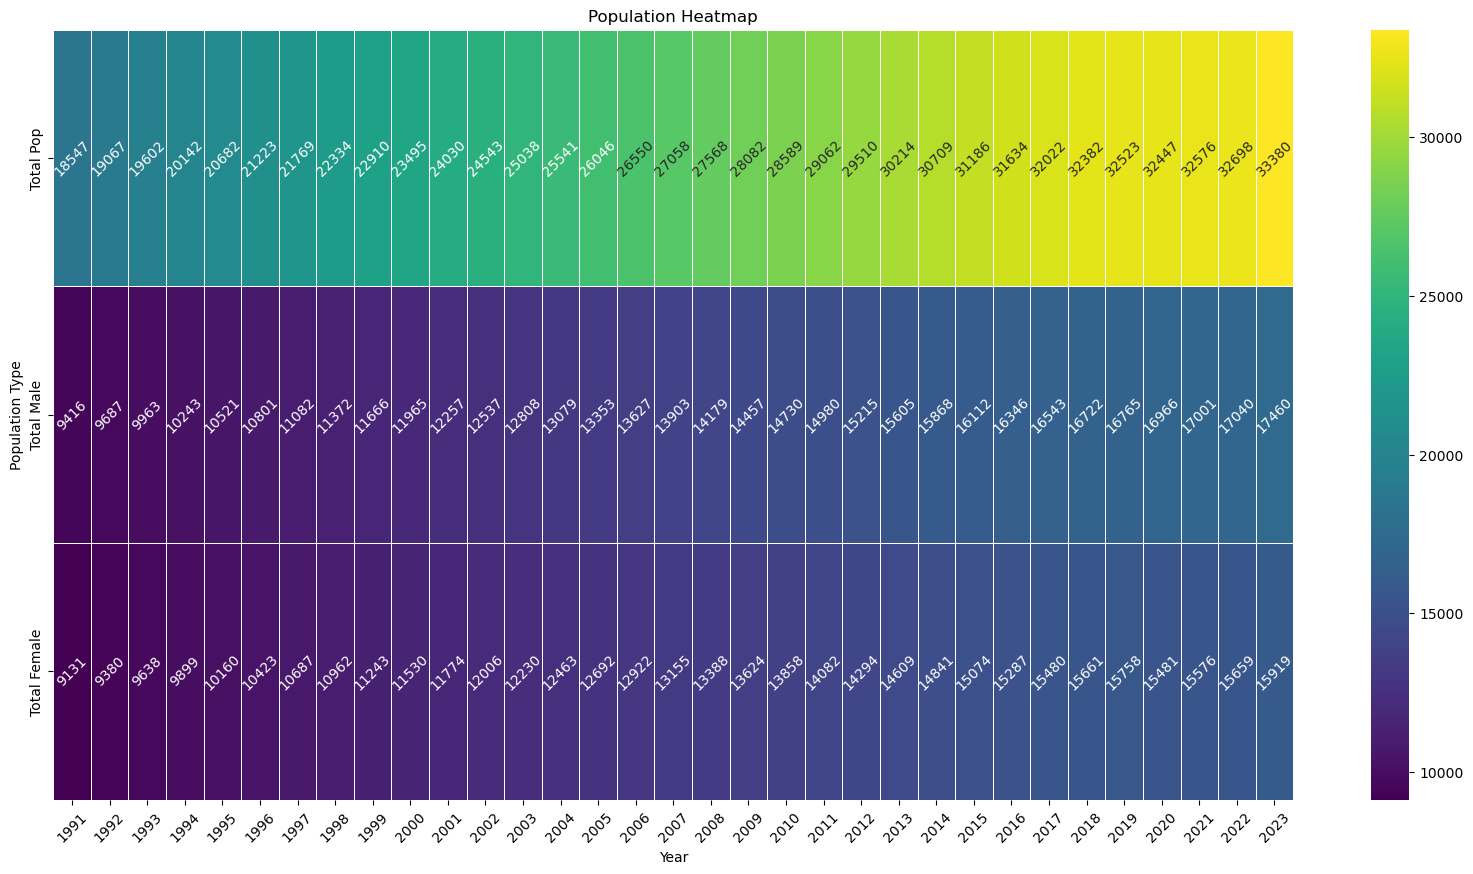

In [7]:
heatmap_data = combined_pop.set_index('Year').T
plt.figure(figsize=(20,10))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='viridis', cbar=True, linewidth=0.5)

plt.title('Population Heatmap')
plt.xlabel('Year')
plt.ylabel("Population Type")

#rotate annotations
for text in ax.texts:
    text.set_rotation(45)

plt.xticks(rotation=45)

plt.show()